In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

# Load the dataset
completedata = pd.read_csv("training.csv")
data = completedata.groupby('fire', group_keys=False).apply(
    lambda x: x.sample(frac=0.5, random_state=42)
).reset_index(drop=True)
print(data.info())
print(data.head())  # Display the first 5 rows


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107272 entries, 0 to 107271
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           107272 non-null  object 
 1   temperature_2m                 107272 non-null  float64
 2   relative_humidity_2m           107272 non-null  float64
 3   dew_point_2m                   107272 non-null  float64
 4   apparent_temperature           107272 non-null  float64
 5   precipitation                  107272 non-null  float64
 6   rain                           107272 non-null  float64
 7   snowfall                       107272 non-null  float64
 8   snow_depth                     107272 non-null  float64
 9   weather_code                   107272 non-null  float64
 10  pressure_msl                   107272 non-null  float64
 11  surface_pressure               107272 non-null  float64
 12  cloud_cover                   

/var/folders/qz/hs0ycjsn7cj61jkwb1p_v44h0000gn/T/ipykernel_4572/3164287120.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = completedata.groupby('fire', group_keys=False).apply(


In [12]:
# Preprocessing
data.fillna(0, inplace=True)  # Fill missing values
data.drop(['date', 'month'], axis=1, inplace=True)  # Drop unnecessary columns

# Split data into features and target
X = data.drop('fire', axis=1)
y = data['fire']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
X_test_transformed = scaler.transform(X_test)

In [13]:
# Train the SVM model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train_transformed, y_train)

# Predictions
y_train_pred = svm_model.predict(X_train_transformed)
y_test_pred = svm_model.predict(X_test_transformed)

In [14]:
# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")

Training Accuracy: 71.21%
Test Accuracy: 69.36%
Precision: 64.05%
Recall: 86.61%
F1 Score: 73.64%


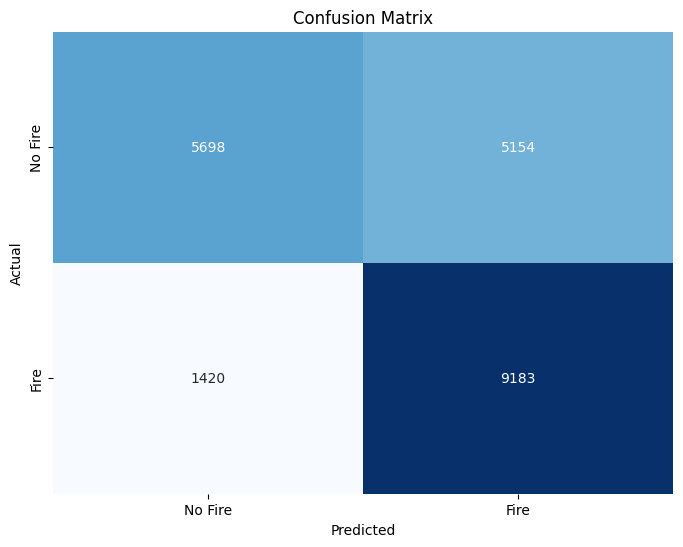

In [15]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Fire', 'Fire'],
            yticklabels=['No Fire', 'Fire'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [16]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# ROC Curve and AUC
y_scores = svm_model.predict_proba(X_test_transformed)[:, 1]
auc_score = roc_auc_score(y_test, y_scores)
print(f"AUC-ROC Score: {auc_score:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.53      0.63     10852
           1       0.64      0.87      0.74     10603

    accuracy                           0.69     21455
   macro avg       0.72      0.70      0.69     21455
weighted avg       0.72      0.69      0.68     21455

AUC-ROC Score: 0.75


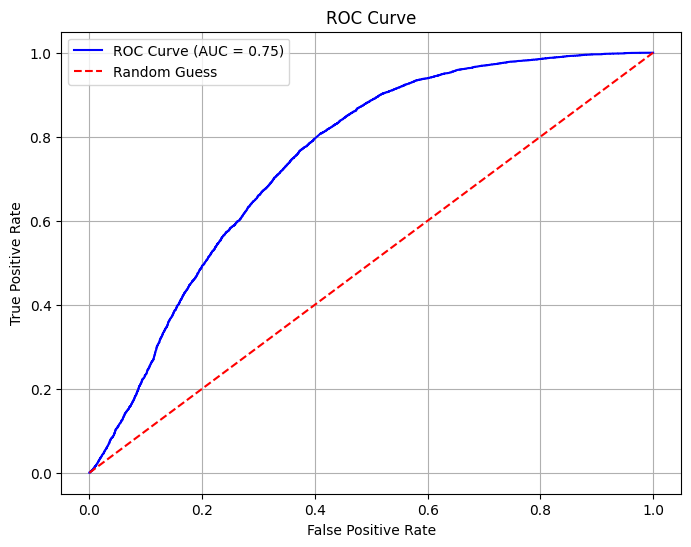

In [17]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()